# Thunder Basin Antelope Study

## Linear Regression in Multiple Variables

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [304]:
"""
The data (X1, X2, X3, X4) are for each year. 
X1 = spring fawn count/100
X2 = size of adult antelope population/100
X3 = annual precipitation (inches)
X4 = winter severity index (1=mild, 5=severe)

"""

df = pd.read_excel("mlr01.xls")

X = df.as_matrix()


In [305]:
X

array([[ 2.9000001 ,  9.19999981, 13.19999981,  2.        ],
       [ 2.4000001 ,  8.69999981, 11.5       ,  3.        ],
       [ 2.        ,  7.19999981, 10.80000019,  4.        ],
       [ 2.29999995,  8.5       , 12.30000019,  2.        ],
       [ 3.20000005,  9.6       , 12.60000038,  3.        ],
       [ 1.89999998,  6.80000019, 10.60000038,  5.        ],
       [ 3.4000001 ,  9.69999981, 14.10000038,  1.        ],
       [ 2.0999999 ,  7.9000001 , 11.19999981,  3.        ]])

In [306]:
df

,X1,X2,X3,X4
0,2.9,9.2,13.2,2
1,2.4,8.7,11.5,3
2,2.0,7.2,10.8,4
3,2.3,8.5,12.3,2
4,3.2,9.6,12.6,3
5,1.9,6.8,10.6,5
6,3.4,9.7,14.1,1
7,2.1,7.9,11.2,3


# Check relationships between variables

<IPython.core.display.Javascript object>


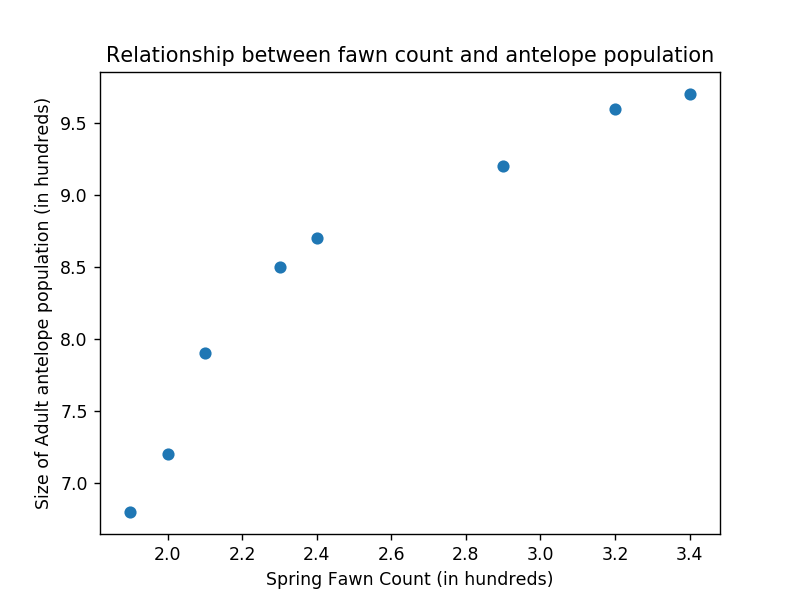

<IPython.core.display.Javascript object>


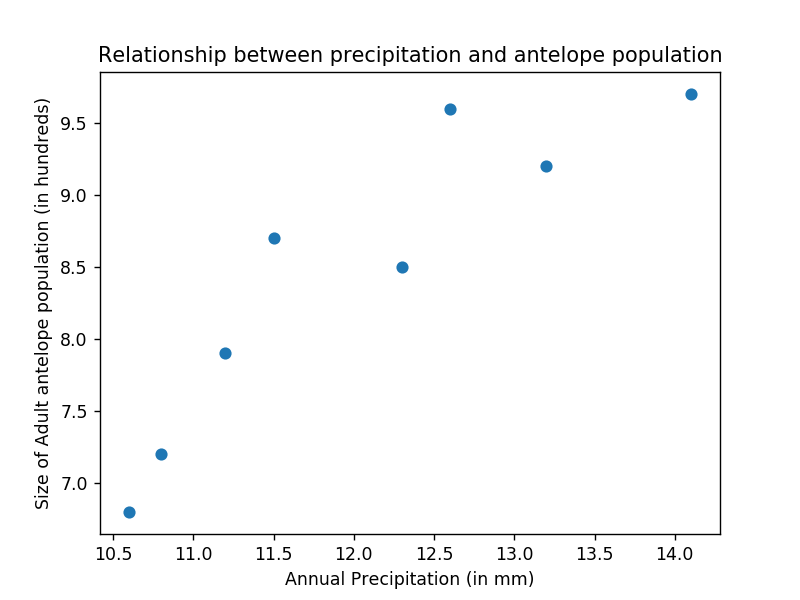

<IPython.core.display.Javascript object>


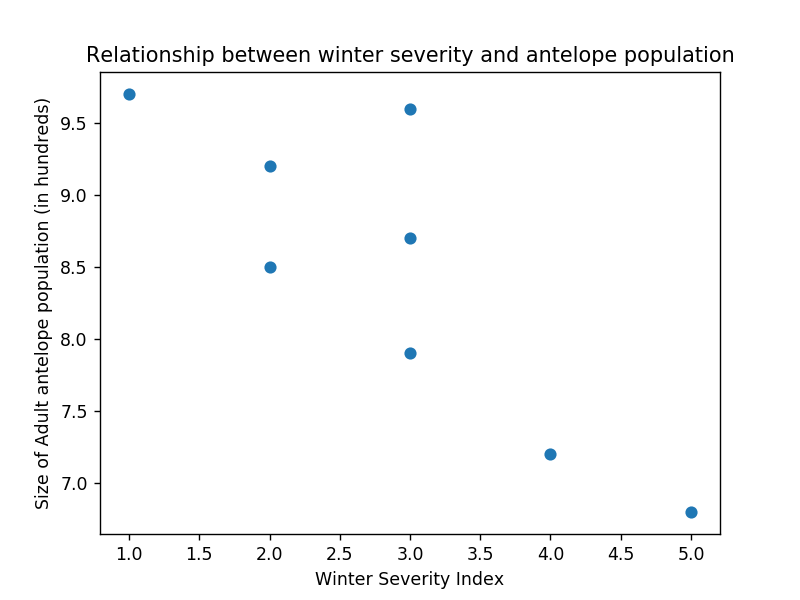

In [307]:
# Check how the relationship between size of adult antelope population and size of fawns
# (Relation between X1 and X2)

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.title("Relationship between fawn count and antelope population")
plt.xlabel("Spring Fawn Count (in hundreds)")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.show()

# Check how the antelope population is affected by precipitation
# (Relation between X2 and X4)

plt.figure()
plt.scatter(X[:,2],X[:,1])
plt.title("Relationship between precipitation and antelope population")
plt.xlabel("Annual Precipitation (in mm)")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.show()


# Check how the severity of the winter affects the antelope population
plt.figure()
plt.scatter(X[:,3],X[:,1])
plt.title("Relationship between winter severity and antelope population")
plt.xlabel("Winter Severity Index")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.show()


# Investigating the prominent climatic condition that affects antelope population

In [308]:
df['Bias'] = 1

Y = df['X2']
X34 = df[['X3', 'X4', 'Bias']] # Effect of precipitation and winter severity on antelope population 
X3 = df[['X3','Bias']] # Effect of precipitation on antelope population
X4 = df[['X4','Bias']] # Effect of winter severity on antelope population


In [309]:
def get_r2(X,Y):
    # X - actual, Y - predicted
    w = np.linalg.solve(X.T.dot(X),X.T.dot(Y))
    Yhat = X.dot(w)
    ss_res = Y - Yhat
    ss_total = Y - Y.mean()
    r2 = 1 - ss_res.dot(ss_res)/ss_total.dot(ss_total)
    return r2


In [310]:
print("r2 for x3 only = ",get_r2(X3,Y))
print("r2 for x4 only = ",get_r2(X4,Y))
print("r2 for x3 and x4 = ",get_r2(X34,Y))

r2 for x3 only =  0.8146546019640151
r2 for x4 only =  0.6995600674280822
r2 for x3 and x4 =  0.8175344801019084


It can be observed that annual precipitation (x3) has the more significant effect on the adult antelope population (x2) than winter severity (x4).

# Training a Linear Model to observe effect of climatic conditions on antelope population

In [311]:
X = df.as_matrix()

# Creating train and test sets
train_test_split_ratio = 0.8

train_indices = np.random.choice(len(X), round(len(X)*train_test_split_ratio),replace=False)
train_indices.sort()
train_indices.tolist()
test_indices = np.setdiff1d(np.arange(len(X)),train_indices)

# Confirming whether the no. of training and testing points add up to the the total no. of datapoints
assert len(X) == len(train_indices) + len(test_indices)

In [312]:
train_indices

array([0, 1, 3, 5, 6, 7])

In [313]:
test_indices

array([2, 4])

In [314]:
X

array([[ 2.9000001 ,  9.19999981, 13.19999981,  2.        ,  1.        ],
       [ 2.4000001 ,  8.69999981, 11.5       ,  3.        ,  1.        ],
       [ 2.        ,  7.19999981, 10.80000019,  4.        ,  1.        ],
       [ 2.29999995,  8.5       , 12.30000019,  2.        ,  1.        ],
       [ 3.20000005,  9.6       , 12.60000038,  3.        ,  1.        ],
       [ 1.89999998,  6.80000019, 10.60000038,  5.        ,  1.        ],
       [ 3.4000001 ,  9.69999981, 14.10000038,  1.        ,  1.        ],
       [ 2.0999999 ,  7.9000001 , 11.19999981,  3.        ,  1.        ]])

In [315]:
train = X[train_indices]
test = X[test_indices]


X_train = train[:,2:5]
Y_train = train[:,1]
X_test = test[:,2:5]
Y_test = test[:,1]

In [316]:
X_train

array([[13.19999981,  2.        ,  1.        ],
       [11.5       ,  3.        ,  1.        ],
       [12.30000019,  2.        ,  1.        ],
       [10.60000038,  5.        ,  1.        ],
       [14.10000038,  1.        ,  1.        ],
       [11.19999981,  3.        ,  1.        ]])

In [317]:
Y_train

array([9.19999981, 8.69999981, 8.5       , 6.80000019, 9.69999981,
       7.9000001 ])

In [318]:
X_test

array([[10.80000019,  4.        ,  1.        ],
       [12.60000038,  3.        ,  1.        ]])

In [319]:
Y_test

array([7.19999981, 9.6       ])

<IPython.core.display.Javascript object>


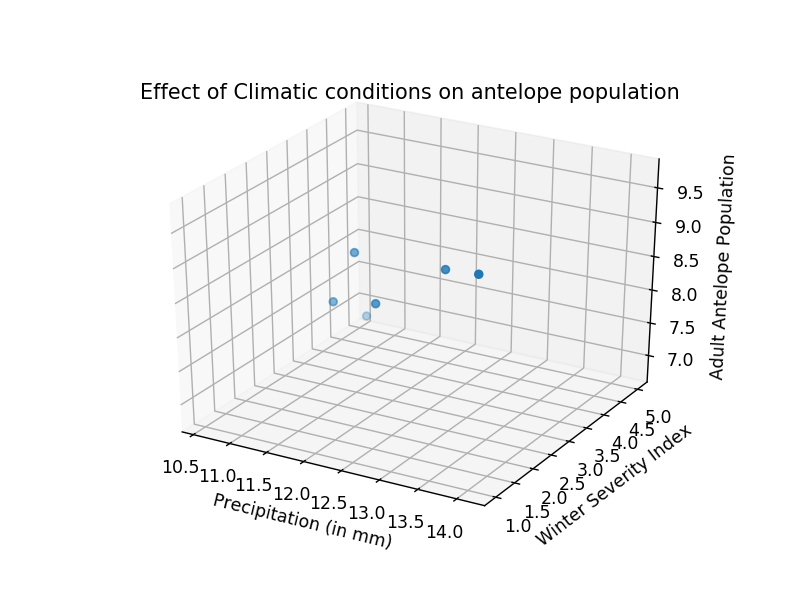

In [320]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],Y_train)
ax.set_xlabel("Precipitation (in mm)")
ax.set_ylabel("Winter Severity Index")
ax.set_zlabel("Adult Antelope Population")
ax.set_title("Effect of Climatic conditions on antelope population")
plt.show()

In [321]:
w = np.linalg.solve(X_train.T.dot(X_train),X_train.T.dot(Y_train))
Yhat_train = X_train.dot(w)

ss_res = Y_train - Yhat_train
ss_total = Y_train - Y_train.mean()
train_r2 = 1 - ss_res.dot(ss_res)/ss_total.dot(ss_total)
print("r2 score for training data = ", train_r2)

r2 score for training data =  0.9053767675932485


In [322]:
w

array([ 0.26243209, -0.47300601,  6.5394661 ])

In [323]:
# Use w calculated from training phase to predict values in test set
Yhat_test = X_test.dot(w)

ss_res1 = Y_test - Yhat_test
ss_total1 = Y_test - Y_test.mean()
test_r2 = 1 - ss_res1.dot(ss_res1)/ss_total1.dot(ss_total1)
print("r2 score for testing data = ", test_r2)

r2 score for testing data =  0.4947667606765921


<IPython.core.display.Javascript object>


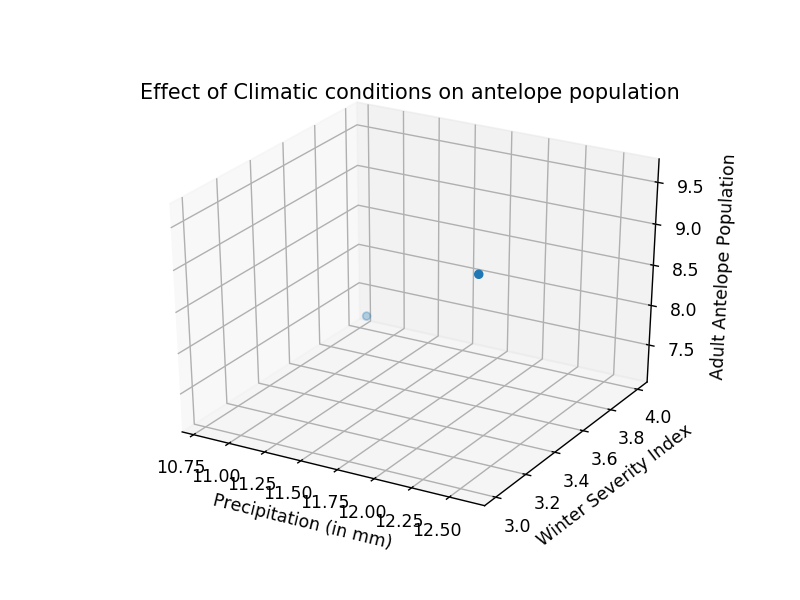

In [324]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[:,0],X_test[:,1],Y_test)
ax.set_xlabel("Precipitation (in mm)")
ax.set_ylabel("Winter Severity Index")
ax.set_zlabel("Adult Antelope Population")
ax.set_title("Effect of Climatic conditions on antelope population")
plt.show()

In [325]:
w

array([ 0.26243209, -0.47300601,  6.5394661 ])

<IPython.core.display.Javascript object>


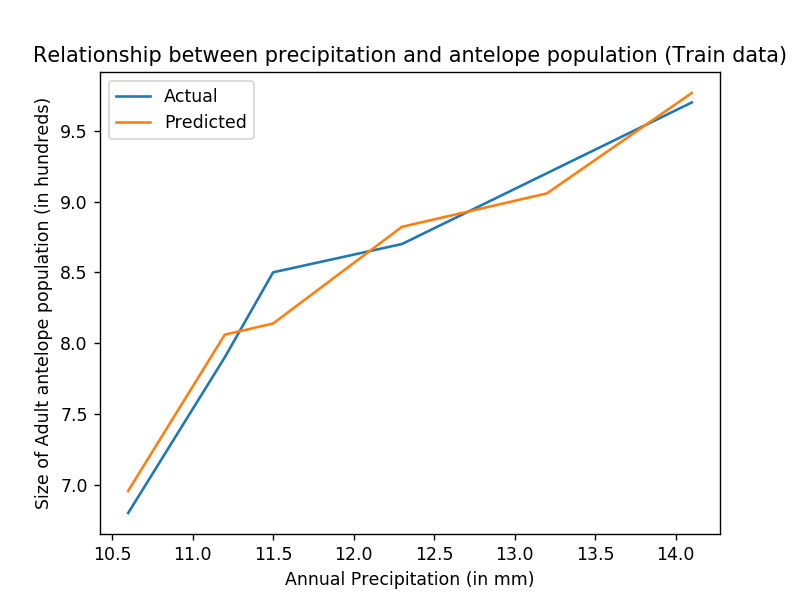

In [326]:
plt.figure()
plt.plot(sorted(X_train[:,0]), sorted(Y_train), label="Actual")
plt.plot(sorted(X_train[:,0]), sorted(Yhat_train), label="Predicted")
plt.title("Relationship between precipitation and antelope population (Train data)")
plt.xlabel("Annual Precipitation (in mm)")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


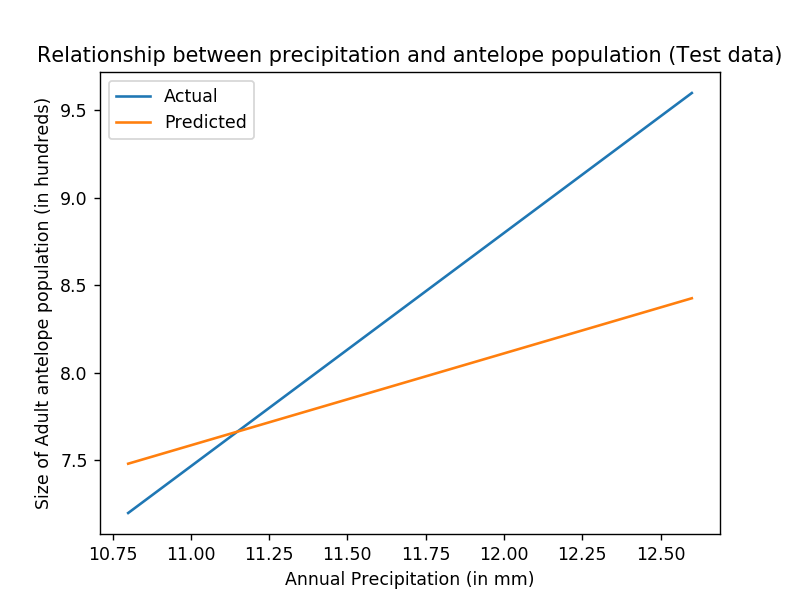

In [327]:
plt.figure()
plt.plot(X_test[:,0], Y_test,label="Actual")
plt.plot(X_test[:,0], Yhat_test,label="Predicted")
plt.title("Relationship between precipitation and antelope population (Test data)")
plt.xlabel("Annual Precipitation (in mm)")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


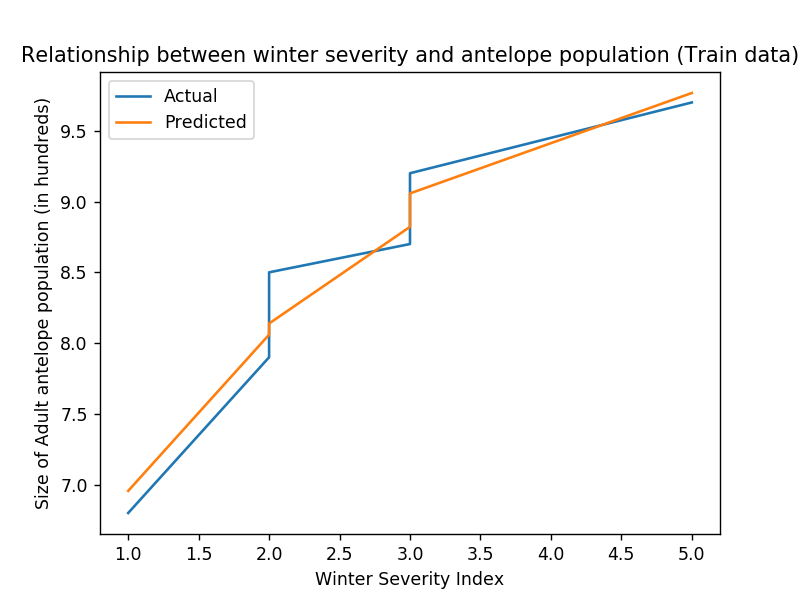

In [328]:
plt.figure()
plt.plot(sorted(X_train[:,1]), sorted(Y_train), label="Actual")
plt.plot(sorted(X_train[:,1]), sorted(Yhat_train), label="Predicted")
plt.title("Relationship between winter severity and antelope population (Train data)")
plt.xlabel("Winter Severity Index")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


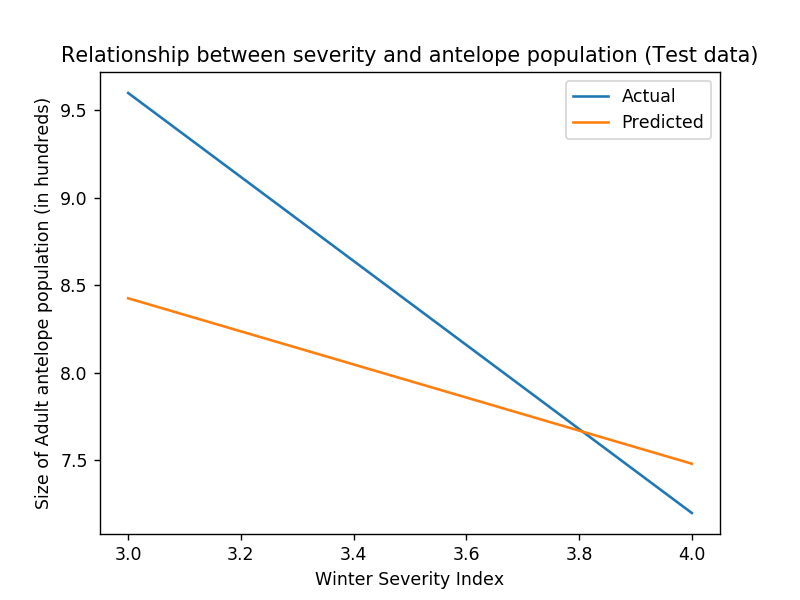

In [329]:
plt.figure()
plt.plot(X_test[:,1], Y_test,label="Actual")
plt.plot(X_test[:,1], Yhat_test,label="Predicted")
plt.title("Relationship between severity and antelope population (Test data)")
plt.xlabel("Winter Severity Index")
plt.ylabel("Size of Adult antelope population (in hundreds)")
plt.legend()
plt.show()
